<a href="https://colab.research.google.com/github/Albina1310/Albina1310/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%B1%D0%B0%D0%BD%D0%BA%D0%B0_%D0%B8_%D0%B8%D1%85_%D1%81%D0%B5%D0%B3%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ клиентов банка и их сегментация.

**Бизнес цель:** Понять какие клиенты склонны к уходу, с целью уменьшения их оттока.

**Наша задача: проанализировать клиентов регионального банка и сегментировать их, обращая внимание на отток. Это позволит банку в дальнейшем составить портрет пользователя, склонного уходить, с целью уменьшения их оттока.**

**План основного проекта**:
1. Открыть файл и изучить общую информацию.
- посмотрим общую информацию
- рассмотрим данные на пропуски и дубликаты
- рассмотрим все ли данные в нужном типе
- посомтреть выбросы в данных
2. Предобработка данных:
- уберем дубликаты
- приведем данные в нужный тип
- приведем названия столбцов к общему стилю
- посомтреть выбросы в данных
- посмотрим причину пропусков
3. Исследовательский анализ данных:
- посмотрим распределения данных по количеству продуктов
- посмотрим портрет типичного клиента по количеству продуктов и по оттоку
- сегментируем клиентов
- составим портрет клиента, склонного уходить
4. Статистический анализ данных:
- проверить гипотезу: возраст клиентов, имеющий 2 продукта различается с возрастом клиентов, имеющих 1 продукт.
- проверить гипотезу: баллы кредитного скоринга клиентов, имеющих 2 продукта равны баллам кредитного скоринга клиентов, имеющих 1 продукт.
5. Общий вывод и рекомендации

**Предоставлены данные:**
- userid — идентификатор пользователя,
- score — баллы кредитного скоринга,
- city — город,
- gender — пол,
- age — возраст,
- equity — оценка объектов недвижимости,
- balance — баланс на счёте,
- products — количество продуктов, которыми пользуется клиент,
- credit_card — есть ли кредитная карта,
- last_activity — активный клиент,
- est_salary — заработная плата клиента,
- churn — ушёл или нет.


## Откроем файл и изучим общую информацию

In [ ]:
# импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objects as go
import plotly.express as px
import scipy
from scipy import stats as st
pd.options.display.max_rows = 100
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# откроем файл и посмотрим общую информацию
df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


10000 строк и 12 колонок. Наименования cтолбцов в разном стиле, также столбцы: score, age, equity, credit_card, last_activity, churn нужно перевести в нужный тип данных.

In [ ]:
# посмотрим первые пять строк таблицы
df.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [ ]:
# проверяем на количество пропусков и дубликатов
print(f'Количество пропусков в таблице:\n{df.isna().sum()}')
print()
print('Количество дубликатов в таблице:', df['USERID'].duplicated().sum())

Количество пропусков в таблице:
USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

Количество дубликатов в таблице: 73


Видим что есть дубликаты в количестве 73 штуки по идентификатору пользователя - мы их удалим. Есть пропуски в поле "age" - их тоже уберем. Есть пропуски в столбце с "balance" - их достаточно много, необходимо разобраться в причинах такого большого количества пропусков.

## Предобработка данных

In [ ]:
# сделаем копию, так как далее может пригодится исходная таблица
data = df.copy()

In [ ]:
# уберем дубликаты по столбцу с идентефикатором пользователя
data.drop_duplicates(subset=['USERID'], inplace=True)

In [ ]:
# пропуски уберем в столбце возраста
data.dropna(subset=['age'], inplace=True)

city
Ярославль    0.64
Рыбинск      0.25
Ростов       0.10
Name: city, dtype: float64

products
1    0.85
2    0.14
3    0.01
0    0.00
Name: products, dtype: float64

credit_card
1    0.82
0    0.18
Name: credit_card, dtype: float64

last_activity
1    0.55
0    0.45
Name: last_activity, dtype: float64

churn
0    0.99
1    0.01
Name: churn, dtype: float64



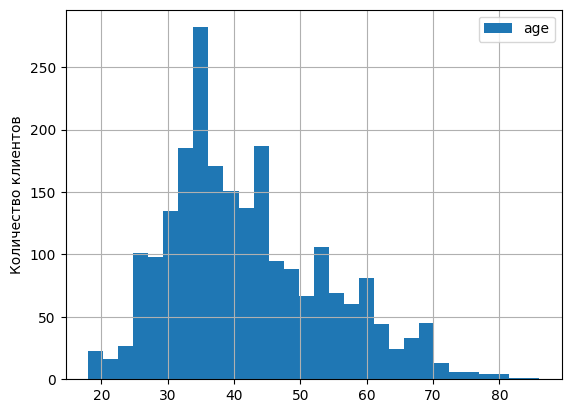

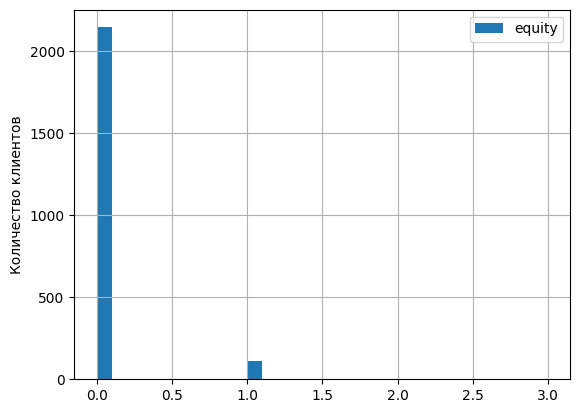

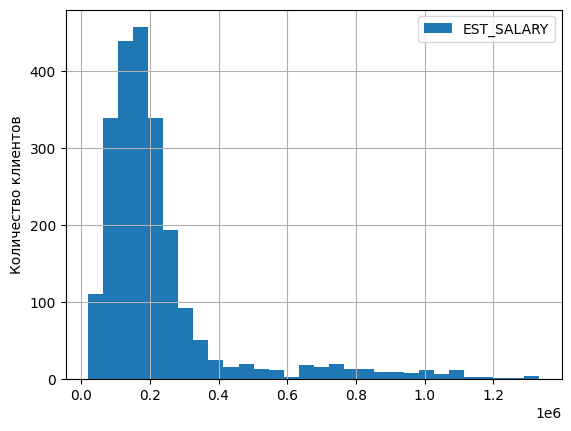

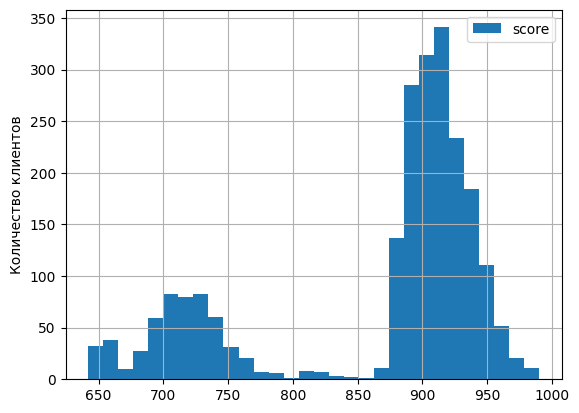

In [ ]:
# посмотрим пропуски в столбце с "балансом" и попробуем понять что с ними делать:
# создадим таблицу с этими пропущенными значениями

nan_balance = data.query('balance.isna()')

#смотрим распредление пропущенных значений баланса по городу, количеству продуктов, крединой карте, активности, оттоку
# также по возрасту, оценке недвижимости, зарплате и оценке кредитного скоринга

for column in ['city','products','credit_card','last_activity', 'churn']:
    print(column)
    print(round(nan_balance[column].value_counts(normalize=True), 2))
    print()

for column in ['age','equity', 'EST_SALARY', 'score']:
    nan_balance.plot(y = column, kind = 'hist', bins = 30, grid = True)
    plt.ylabel('Количество клиентов')

Исследовав пропуски баланса относительно других признаков вывели интересные закономерности:
- в 64% это клиенты города Ярославль
- в 85% имеют 1 продукт
- в 82% имеют кредитную карту
- в равной степени активные и не активные
- в 99% клиенты уходят
- возраст распределен равномерно
- практически все клиенты имеют оценку недвижимости "0"
- зарплаты тоже различные: 60-230 т.р.
- оценки кредитного скоринга в большинстве случаев высокие: 880-940

Здесь главный явный критерий для клиентов с пропущенными значениями по балансу - это отток всех этих клиентов с банка.
Заменить каким - либо средним значением или медианой не видется возможным, также удалять не будем - их слишком много и уйдет вместе с ними большое количество нужной информации. Оставим как есть в данных этот столбец.

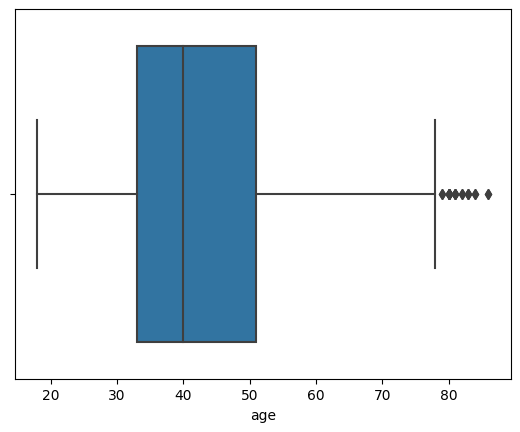

count    9923.000000
mean       42.729215
std        12.177008
min        18.000000
25%        33.000000
50%        40.000000
75%        51.000000
max        86.000000
Name: age, dtype: float64


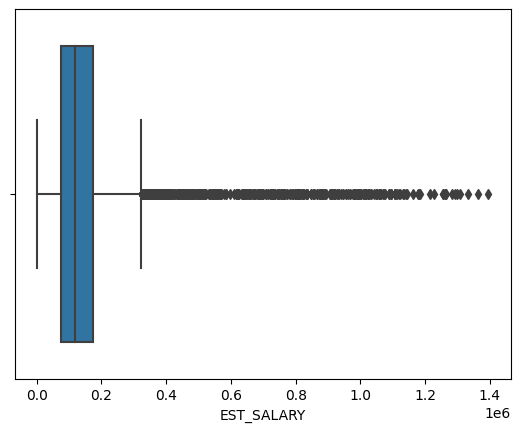

count    9.923000e+03
mean     1.478865e+05
std      1.393639e+05
min      2.546300e+03
25%      7.525212e+04
50%      1.197193e+05
75%      1.746733e+05
max      1.395064e+06
Name: EST_SALARY, dtype: float64


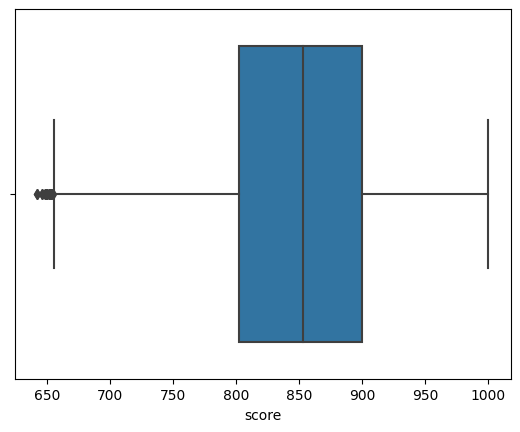

count    9923.000000
mean      848.732339
std        65.400112
min       642.000000
25%       802.000000
50%       853.000000
75%       900.000000
max      1000.000000
Name: score, dtype: float64


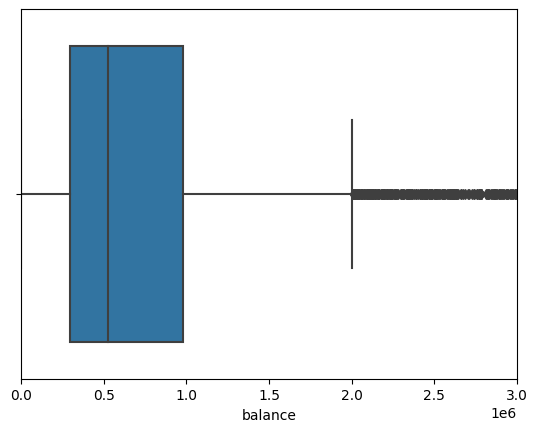

count    7.663000e+03
mean     8.282482e+05
std      1.984248e+06
min      0.000000e+00
25%      2.954990e+05
50%      5.249612e+05
75%      9.808015e+05
max      1.191136e+08
Name: balance, dtype: float64


In [ ]:
# построим диаграмму "ящик с усами" и определим выбросы в столбцах
# с возрастом, балансом, оценке кредитного скоринга и зарплате
for column in ['age', 'EST_SALARY', 'score']:
    plt.figure()
    sns.boxplot(x=column, data=data)
    plt.show()
    print(data[column].describe());

plt.figure()
sns.boxplot(x='balance', data=data)
plt.xlim(0, 3000000)
plt.show()
print(data['balance'].describe())

Рассмотрели выбросы по столбцам и увидели следующее:
- размах в возрасте от 18-86, выбросы с 77 лет, среднее и медиана почти равны 40-42 года - это означает что выбросы не влияют в целом на данные.
- рахмах в зарплате от 2500 - 1395000 р., выбросы начинаются свеше 325 т.р., среднее и медиана отличаются 119-147 т.р. - это означает что эти выбросы могут влияют на остальные показатели.
- размах в оценке от 642-100, выбросы ниже оценки 655, среднее и медиана практически равны -848-853 - это означает что эти выбросы в целом не влияют на анализ.
- размах в балансе от 0 - 119 млн.р.,выбросы начинаются от 2 млн.р., среднее и медиана сильно различаются - 828-524 тыс.р. - это говорит что клиентов с высоким балансом много и мы посмотрим сколько таких выбросов далее.

In [ ]:
# посмотрим количество выбросов по этим колонкам и подумаем что с ними делать

print('Количество выбросов по возрасту',data[data['age'] > 77]['USERID'].count())
print('Количество выбросов по зарплате', data[data['EST_SALARY'] > 325000]['USERID'].count())
print('количество выбросов по оценке кредитного скоринга', data[data['score'] < 655]['USERID'].count())
print('количество выбросов по балансу',data[data['balance'] >= 2000000]['USERID'].count())

Количество выбросов по возрасту 28
Количество выбросов по зарплате 471
количество выбросов по оценке кредитного скоринга 33
количество выбросов по балансу 427


По возрасту и оценке кредитного скоринга выбросов немного и удалять или как то отдельно рассматривать не будем. Что касается зарплаты и баланса, то клиентов с высокими "доходами" мы убирать с данных не будем - ведь это не анамалия, такие клиенты вполне могут быть, мы их выделим в сегмент "вип клиентов" - приносящих большие деньги.

In [ ]:
# наименования колонок сделаем в одном стиле
data.columns = data.columns.str.lower()
data = data.rename(columns = {'userid': 'id'})

In [ ]:
#  приведем данные в нужный тип
data['age'] = data['age'].astype(int)
data['churn'] = data['churn'].astype(str)
data['score'] = data['score'].astype(int)
data['equity'] = data['equity'].astype(str)
data['credit_card'] = data['credit_card'].astype(str)
data['last_activity'] = data['last_activity'].astype(str)

   products    id
0         0     1
1         1  3306
2         2  5095
3         3  1028
4         4   474
5         5    19


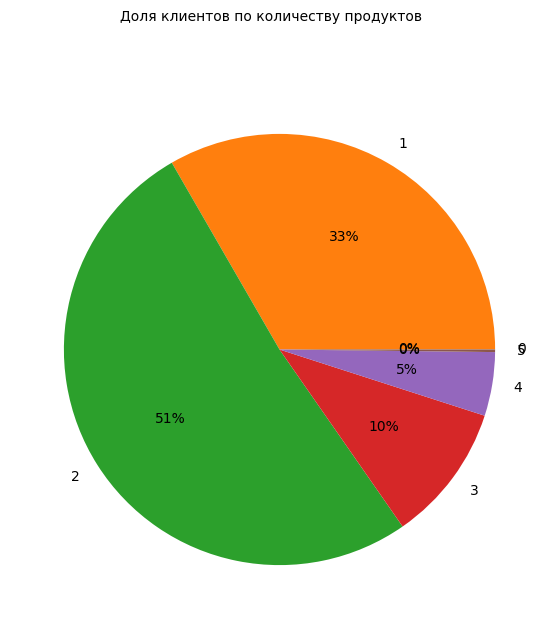

In [ ]:
#  посмотрим распределение клиентов по количеству продуктов
products = data.groupby('products')['id'].count().reset_index()
print(products)

# построим график
fig,(ax1) = plt.subplots(figsize=(7, 7))
fig.suptitle('Доля клиентов по количеству продуктов', fontsize=10)
ax1.pie(products['id'], labels=products['products'], autopct='%.0f%%');

Большое число клиентов имеет 2 продукта - 51%, затем 1 продукт - 33%. Уберем строку продуктом - 0 - это скорее тех.ошибка, также уберем клиентов с 5 продуктами - слишком мало таких клиентов и отдельно их анализировать не имеет смысла.

In [ ]:
# посмотрим клиента с нулевым продуктом
data[data['products'] == 0]

# удалим по индексу клиента с нулевым продуктом
data = data.drop(8957)

# уберем клиентов с таблицы с количеством 5 продуктов
data = data.query('products != 5')

print('Потеряли', (round((100 - (data.shape[0] / df.shape[0]*100)), 1)),'% данных.')

Потеряли 1.0 % данных.


**Вывод:** Предобработку данных завершили. Убрали 1% данных, что вполне приемлемо и не повлияет на дальнейший анализ. Посмотрели пропуски и дубликаты, также рассмотрели выбросы. Данные в нужном типе, можем приступить непосредственно к анализу.

##  Исследовательский анализ данных

### Распределение отточных\ не отточных по количеству продуктов

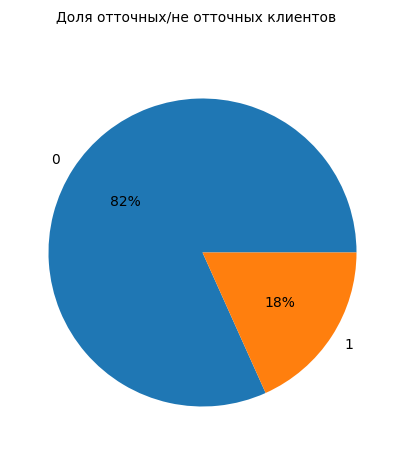

In [ ]:
# сделаем таблицу количества отточны\не отточных клиентов
churn = data.groupby('churn')['id'].count().reset_index()

# построим график и визуально оценим долю отточных\не отточных всего
fig,(ax1) = plt.subplots(figsize=(5, 5))
fig.suptitle('Доля отточных/не отточных клиентов', fontsize=10)
ax1.pie(churn['id'], labels=churn['churn'], autopct='%.0f%%');

Всего отточных клиентов от общего числа - 18% - что достаточно много.

In [ ]:
# построим таблицу для просмотра отточных клиентов по количеству продуктов
products_churn = data.pivot_table(index=['products', 'churn'], values='id', aggfunc='count').reset_index()
products_churn = products_churn.rename(columns={'id':'count'})
products_churn['total'] = products_churn.groupby('products')['count'].transform('sum')
products_churn = products_churn.sort_values(by='total')
products_churn['persent'] = round(products_churn['count']/products_churn['total']*100, 2)
products_churn['products'] = products_churn['products'].astype(str)
products_churn

,products,churn,count,total,persent
6,4,0,174,474,36.71
7,4,1,300,474,63.29
4,3,0,731,1028,71.11
5,3,1,297,1028,28.89
0,1,0,3071,3306,92.89
1,1,1,235,3306,7.11
2,2,0,4117,5095,80.80
3,2,1,978,5095,19.20


In [ ]:
# визуализируем таблицу
fig = px.bar(products_churn, x='count', y='products', text='persent', color='churn')
fig.update_layout(title = 'График деления отточных/не отточных клиентов по количеству продуктов у них',
                  xaxis_title = 'Количество клиентов',
                  yaxis_title = 'Количество продуктов у клиента')
fig.show()


Большоя доля отточных у клиентов с 4 продуктами, затем у клиентовс 3 продуктами. Мы видим зависимость оттока от количества продуктов у клиента: чем больше-тем больше.

**Вывод**: таким образом мы увидели взаимосвязь оттока клиентов в зависимости от количества продуктов у него. Пользователи с 4 продуктами наиболее подвержены оттоку. Скорее всего они ищут более выгодные условия в других банках и переходят к ним - чтобы комплекс продуктов был дешевле для клиента. Предположить какие продукты предлагает наш банк мы можем лишь исходя из общей картины, поскольку в данных есть упоминание о крединой карте и балансе, то скорее всего это продукты: кредитная карта, вклад, дебетовая карта, кредитный счет. 18% отточных клиентов скорее всего начало сильно влиять на банковскую деятельность, процент достаточно высокий.

### Посмотрим портрет типичного клиента в разрезе по количеству продуктов и оттоку

#### Посмотрим распределения отточных\не отточных клиентов по количественным показателям

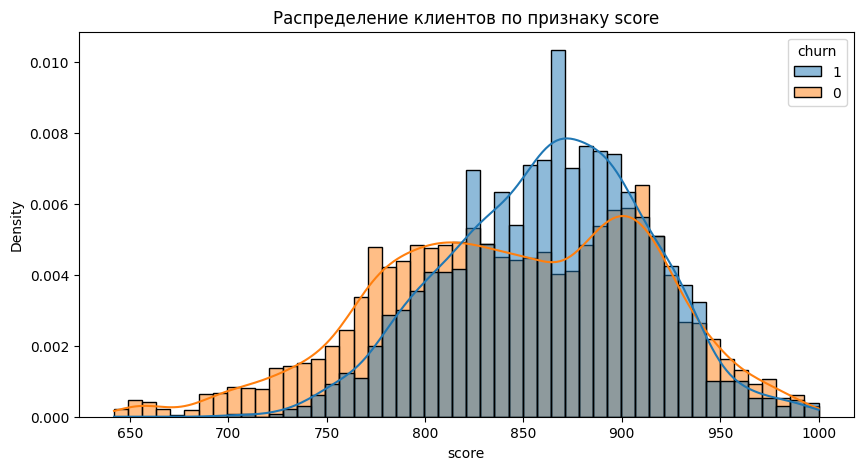

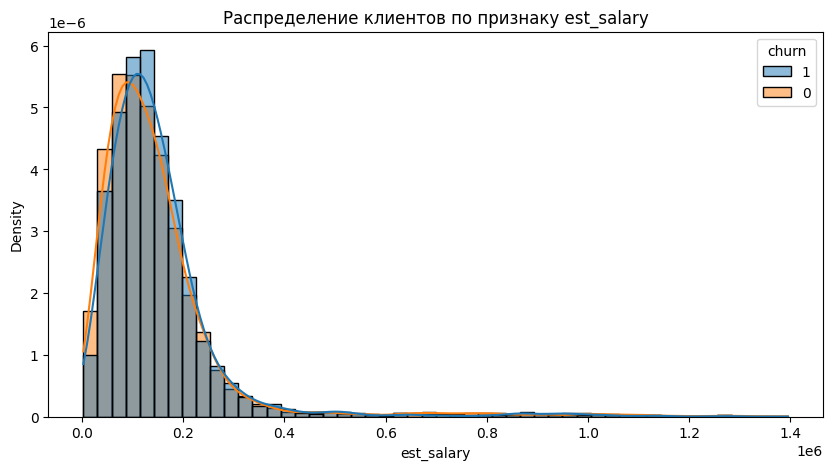

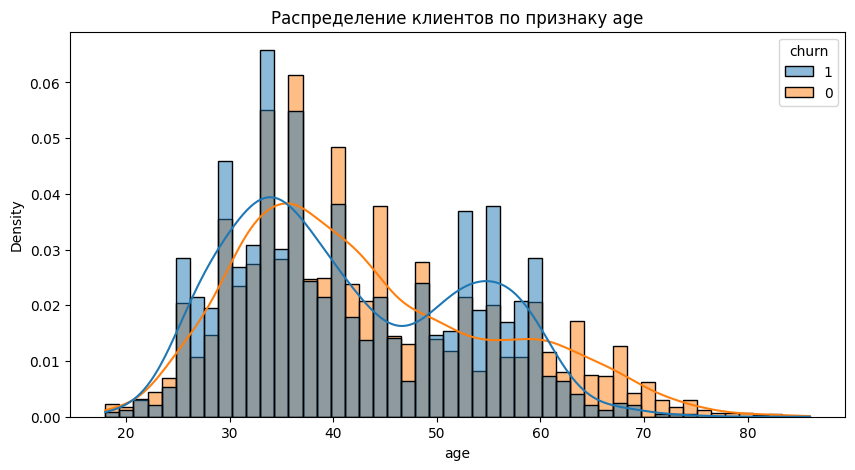

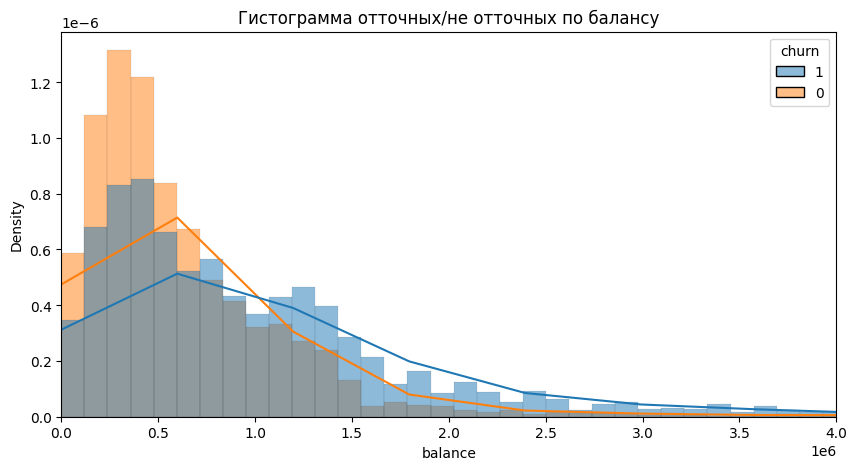

In [ ]:
# посмотрим распредление клиентов отточных\не отточных по признакам

for column in ['score','est_salary', 'age']:
    plt.figure(figsize=(10,5))
    sns.histplot(data=data, x=column, hue='churn', bins=50, kde=True, stat='density', common_norm=False);
    plt.title(f'Распределение клиентов по признаку {column}')
    plt.show()

plt.figure(figsize=(10,5))
sns.histplot(data=data, x='balance', hue='churn', bins=1000, kde=True,  stat='density', common_norm=False)
plt.xlim(0, 4000000)
plt.title("Гистограмма отточных/не отточных по балансу");

Среднее значение отточных клиентов по score 866.0
Среднее значение не отточных клиентов по score 848.0

Среднее значение отточных клиентов по age 39.0
Среднее значение не отточных клиентов по age 40.0

Средний баланс не отточных клиентов (без учета выбросов) 458268.0
Средний баланс отточных клиентов (без учета выбросов) 662069.0

Средняя зарплата у не отточных клиентов (без выбросов) 113765.0
Средняя зарплата у отточных клиентов (без выбросов) 121303.0


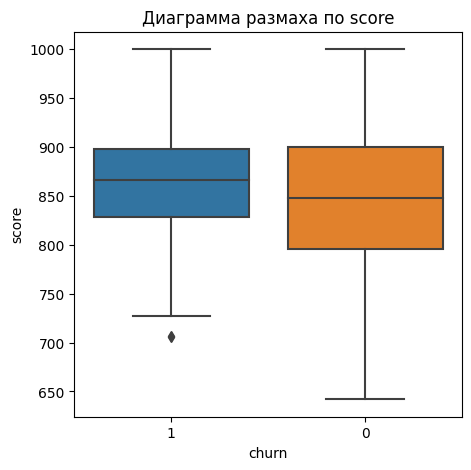

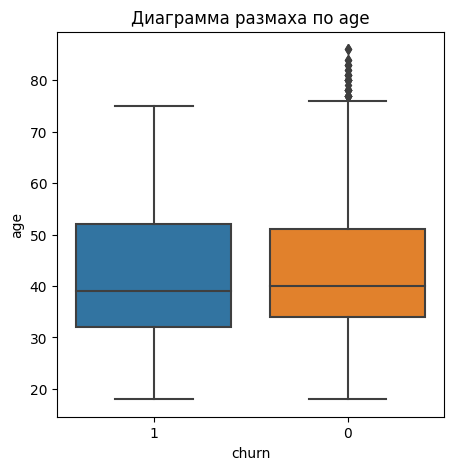

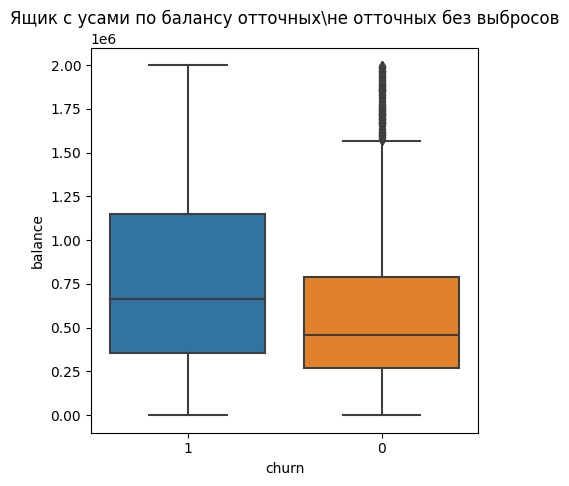

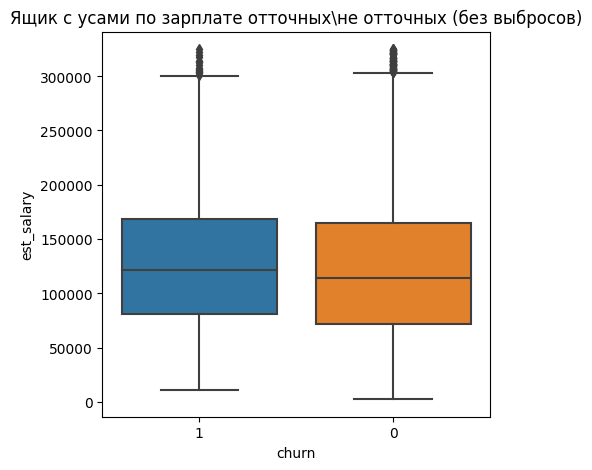

In [ ]:
# посмотрим на график боксплот по отточным\не отточным клиентам по признакам

for column in ['score', 'age']:
    f, ax = plt.subplots(figsize=(5, 5))
    fig = sns.boxplot(x='churn', y=column, data=data)
    plt.title(f'Диаграмма размаха по {column}')
    print(f'Среднее значение отточных клиентов по {column}', data[data['churn'] == '1'][column].median().round())
    print(f'Среднее значение не отточных клиентов по {column}', data[data['churn'] == '0'][column].median().round())
    print()

balance = data[data['balance'] < 2000000]
f, ax = plt.subplots(figsize=(5, 5))
fig = sns.boxplot(x='churn', y='balance', data=balance)
plt.title('Ящик с усами по балансу отточных\не отточных без выбросов')
print('Средний баланс не отточных клиентов (без учета выбросов)', balance[balance['churn'] == '0']['balance'].median().round())
print('Средний баланс отточных клиентов (без учета выбросов)', balance[balance['churn'] == '1']['balance'].median().round())
print()

est_salary = data[data['est_salary'] < 325000]
f, ax = plt.subplots(figsize=(5, 5))
fig = sns.boxplot(x='churn', y='est_salary', data=est_salary)
plt.title('Ящик с усами по зарплате отточных\не отточных (без выбросов)')
print('Средняя зарплата у не отточных клиентов (без выбросов)', est_salary[est_salary['churn'] == '0']['est_salary'].median().round())
print('Средняя зарплата у отточных клиентов (без выбросов)', est_salary[est_salary['churn'] == '1']['est_salary'].median().round())

На графиках видим следующее:
- оценка кредитного скоринга чуть выше у отточных клиентов
- зарплата (по графику распределения) имеет выбросы, которые мы ранее выявили. Не существенно выше зараплата по медиане у отточных (по графику "ящик с усами") в данных без выбросов.
- возраст примерно одинаков для двух групп клиентов
- баланс существенно выделяется - чем выше баланас тем больше становится отточных (по графику распределения). Посмотрев данные без выбросов в балансе ("ящик с усами") видим как медиана у отточных явно выше не отточных.

Снова напрашивается выделение клиентов с высокой зарплатой и балансом в отдельный сегмент.

**Статистически подкрепим** выводы. Проверим на нормальность распределения значений внутри признака(age, score, balance, est_salary) по совокупности отточных\не отточных, применяя критерий Шарпило-Уилка:

H_0: совокупности отточных\не отточных данных по признаку распределены нормально.

H_1: совокупности отточных\не отточных данных по признаку распределены не нормально.

alfa = 0.05

In [ ]:
# проверим поделив данные на группы на отточные/не отточные по признакам: зарплата, оценка, возраст, баланс
# посмотрим на нормальность распределение данных, чтобы определиться с критерием проведения теста
age_0 = data[data['churn']=='0']['age']
age_1 = data[data['churn']=='1']['age']
print(st.shapiro(age_0))
print(st.shapiro(age_1))

score_0 = data[data['churn']=='0']['score']
score_1 = data[data['churn']=='1']['score']
print(st.shapiro(score_0))
print(st.shapiro(score_1))

balance_0 = balance[balance['churn']=='0']['balance']
balance_1 = balance[balance['churn']=='1']['balance']
print(st.shapiro(balance_0))
print(st.shapiro(balance_1))

est_salary_0 = est_salary[est_salary['churn']=='0']['est_salary']
est_salary_1 = est_salary[est_salary['churn']=='1']['est_salary']
print(st.shapiro(est_salary_0))
print(st.shapiro(est_salary_1))

ShapiroResult(statistic=0.9579259157180786, pvalue=3.0828566215145976e-43)
ShapiroResult(statistic=0.9520626068115234, pvalue=6.886150646265129e-24)
ShapiroResult(statistic=0.9877231121063232, pvalue=6.739428532958423e-26)
ShapiroResult(statistic=0.9960335493087769, pvalue=0.00011029481538571417)
ShapiroResult(statistic=0.9172154664993286, pvalue=0.0)
ShapiroResult(statistic=0.948702871799469, pvalue=4.133932172679534e-23)
ShapiroResult(statistic=0.9667147994041443, pvalue=8.10482445276802e-39)
ShapiroResult(statistic=0.9738296270370483, pvalue=3.1199409747095436e-17)


распределение данных в столбцах не нормальное, pvalue < 0.05, поэтому применим критерий сравнения групп Мана-Утни - сравнение двух независимых групп.
Сформируем гипотезы:

H_0: Средние показатели отточных клиентов равны средним показателям не отточных клиентов по признакам

H_a: Средние показатели отточных клиентов отличаются со средними показателями не отточных клиентов по признакам

alfa = 0.05

In [ ]:
print(scipy.stats.mannwhitneyu(age_0, age_1))
print(scipy.stats.mannwhitneyu(score_0, score_1))
print(scipy.stats.mannwhitneyu(balance_0, balance_1))
print(scipy.stats.mannwhitneyu(est_salary_0, est_salary_1))

MannwhitneyuResult(statistic=7826849.5, pvalue=4.7961752574209485e-06)
MannwhitneyuResult(statistic=6278301.5, pvalue=1.8706943383261397e-21)
MannwhitneyuResult(statistic=3452241.0, pvalue=9.354735152039503e-44)
MannwhitneyuResult(statistic=6225427.0, pvalue=1.5293940933619127e-05)


Мы проверили по критерию Мана-Уитни и pvalue меньше 0.05, соответственно у нас есть основания отклонить нулевую гипотезу о равенстве анализируемых показателей. Т.е. данное различие в оценке между группами - отточных\не отточных - является статистически значимым.

#### Посмотрим распределения отточных\не отточных клиентов по качественным показателям

In [ ]:
# создадим таблицу отточных\ не оттточных в разбивке по городам
for column in ['city', 'gender', 'equity', 'credit_card', 'last_activity']:
    data_fig = data.pivot_table(index=[column, 'churn'], values='id', aggfunc='count').reset_index()
    data_fig = data_fig.rename(columns={'id':'count'})
    data_fig['total'] = data_fig.groupby(column)['count'].transform('sum')
    data_fig = data_fig.sort_values(by='total')
    data_fig['persent'] = round(data_fig['count']/data_fig['total']*100, 2)

    # визуализируем таблицу
    fig = px.bar(data_fig, x=column, y='count', text='persent', color='churn')
    fig.update_layout(title = f'График деления отточных/не отточных клиентов по {column}',
                      xaxis_title = column,
                      yaxis_title = 'Количество клиентов')
    fig.show()

По графикам видим следующее:
- наибольшее число клиентов в городе Ярославль, а доля отточных примерно равна между городами
- количество мужчин\женщин равное, а вот доля отточных выше у мужчин - 23%
- наибольшее число клиентов имеют оценку недвижимости от 0-5, при это доля наиболее отточных выше остальных с оценкой 3-5
- большинство клиентов имеют кредитную карту, но наибольшая доля отточных у не имеющих ее - 25%
- количество активных\не активных равны, но доля отточных выше у активных - 24%


Сформулируем гипотезы и проверим **статистическую значимость** в различии пропорций отточных\не отточных по признакам по критерию Х-квадрат.

H_0: Частоты отточных\не отточных равны между паказателями внутри признака (между мужчинами и женщинами, между городами и т.д.)

H_a: Частоты отточных\не отточных разные между паказателями внутри признака (между мужчинами и женщинами, между городами и т.д.)

In [ ]:
# проверим статистическую значимость пропорций отточных\не отточных по качественным признакам
for column in ['gender', 'city', 'equity', 'credit_card', 'last_activity']:
    WG=pd.crosstab(data['churn'],data[column])
    chi2, prob, f, expected = scipy.stats.chi2_contingency(WG)
    output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

    print(output.format( chi2, f, prob))

test Statistics: 198.52115915248572
degrees of freedom: 1
p-value: 4.3909037747645065e-45

test Statistics: 8.504075276214868
degrees of freedom: 2
p-value: 0.014235198154639

test Statistics: 728.3762947121525
degrees of freedom: 9
p-value: 5.4736322951826615e-151

test Statistics: 170.52635734189386
degrees of freedom: 1
p-value: 5.678136252316895e-39

test Statistics: 285.2822268727043
degrees of freedom: 1
p-value: 5.303285750687727e-64



Критерий х-квадрат для проверки связи. p-value меньше 0.05, значит есть основания отклонить нулевую гипотезу: частоты примерно равны. Следовательно связь между этими показателями есть. Пропорции отточных и не отточных клиентов статистически значима.

#### Посмотрим распределение клиентов в разбивке по продуктам по количественным показателям

Text(0.5, 1.0, 'Ящик с усами по балансу в разбивке по продуктам (без выбросов)')

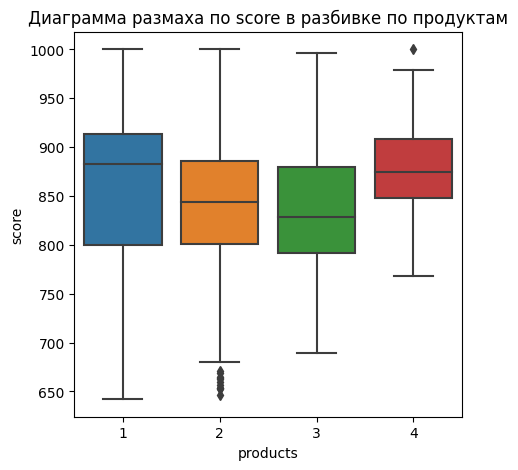

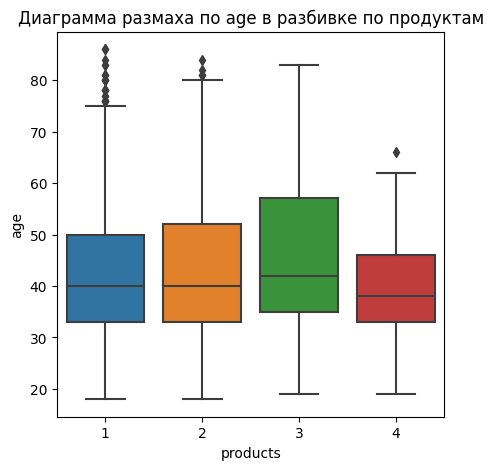

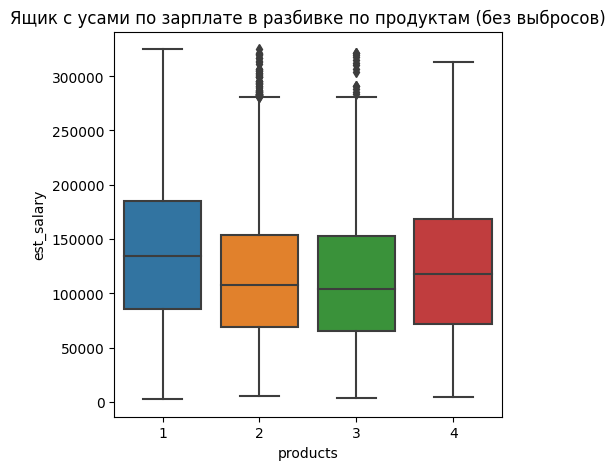

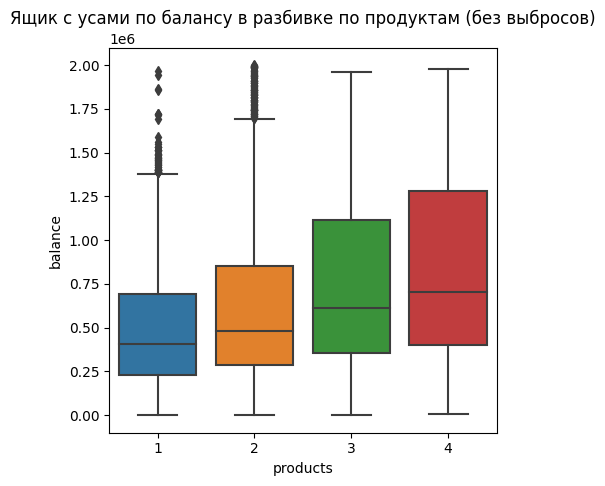

In [ ]:
# посмотрим распределение по графику "Ящик с усами"

for column in ['score', 'age']:
    f, ax = plt.subplots(figsize=(5, 5))
    fig = sns.boxplot(x='products', y=column, data=data)
    plt.title(f'Диаграмма размаха по {column} в разбивке по продуктам')

f, ax = plt.subplots(figsize=(5, 5))
fig = sns.boxplot(x='products', y='est_salary', data=est_salary)
plt.title('Ящик с усами по зарплате в разбивке по продуктам (без выбросов)')

f, ax = plt.subplots(figsize=(5, 5))
fig = sns.boxplot(x='products', y='balance', data=balance)
plt.title('Ящик с усами по балансу в разбивке по продуктам (без выбросов)')


В разбивке по продуктам видим следующее:
- средние высокие оценки имеют клиенты с 1 и 4 продуктами
- возраст примерно одинаков у всех
- средние зарплаты без учета выбросов выше у клиентов с 1 и 4 продуктами
- средний баланс без учета выбросов растет с увеличением продуктов у клиента: чем больше тем больше

**Статистически подкрепим** выводы. Проверим на нормальность распределения значений внутри признака(age, score, balance, est_salary) по совокупности в разбивке по количеству продуктов, применяя критерий Шарпило-Уилка:

H_0: совокупности данных в разбивке по количеству продуктов по признаку распределены нормально

H_1: совокупности данных в разбивке по количеству продуктов по признаку распределены не нормально

alfa = 0.05

In [ ]:
# проверим на нормальность распределение данных по количеству продуктов
score_3 = data[data['products']==1]['score'].values
score_4 = data[data['products']==2]['score'].values
score_5 = data[data['products']==3]['score'].values
score_6 = data[data['products']==4]['score'].values
print(st.shapiro(score_3))
print(st.shapiro(score_4))
print(st.shapiro(score_5))
print(st.shapiro(score_6))

age_3 = data[data['products']==1]['age'].values
age_4 = data[data['products']==2]['age'].values
age_5 = data[data['products']==3]['age'].values
age_6 = data[data['products']==4]['age'].values
print(st.shapiro(age_3))
print(st.shapiro(age_4))
print(st.shapiro(age_5))
print(st.shapiro(age_6))

balance_3 = balance[balance['products']==1]['balance'].values
balance_4 = balance[balance['products']==2]['balance'].values
balance_5 = balance[balance['products']==3]['balance'].values
balance_6 = balance[balance['products']==4]['balance'].values
print(st.shapiro(balance_3))
print(st.shapiro(balance_4))
print(st.shapiro(balance_5))
print(st.shapiro(balance_6))

est_salary_3 = est_salary[est_salary['products']==1]['est_salary'].values
est_salary_4 = est_salary[est_salary['products']==2]['est_salary'].values
est_salary_5 = est_salary[est_salary['products']==3]['est_salary'].values
est_salary_6 = est_salary[est_salary['products']==4]['est_salary'].values
print(st.shapiro(est_salary_3))
print(st.shapiro(est_salary_4))
print(st.shapiro(est_salary_5))
print(st.shapiro(est_salary_6))

ShapiroResult(statistic=0.930814266204834, pvalue=1.2023671747869094e-36)
ShapiroResult(statistic=0.9962881803512573, pvalue=5.165969318987607e-10)
ShapiroResult(statistic=0.9709953665733337, pvalue=1.821469678645743e-13)
ShapiroResult(statistic=0.993358850479126, pvalue=0.03497082367539406)
ShapiroResult(statistic=0.9570617079734802, pvalue=3.514300793252229e-30)
ShapiroResult(statistic=0.9615354537963867, pvalue=9.164443814795302e-35)
ShapiroResult(statistic=0.9590297341346741, pvalue=2.246028826537557e-16)
ShapiroResult(statistic=0.9576762318611145, pvalue=2.0051736659976171e-10)
ShapiroResult(statistic=0.9074790477752686, pvalue=7.570825315078877e-28)
ShapiroResult(statistic=0.9229400157928467, pvalue=2.466285297211678e-43)
ShapiroResult(statistic=0.9414202570915222, pvalue=1.2839121100869384e-18)
ShapiroResult(statistic=0.9377213716506958, pvalue=7.738963983539016e-12)
ShapiroResult(statistic=0.9779706001281738, pvalue=2.6452622066334946e-21)
ShapiroResult(statistic=0.966211020946

Распределения везде ненормальное. Мы применяем **критерий непараметрический Красколо-Уолиса** - четыре группы независимые друг от друга, где ненормально распределены данные для выявления связи признаков.

Гипотезы:

H_0: Средние показатели признаков (баланс, зарплата, возраст, оценка кредитного скоринга) равны между группами по количеству продуктов

H_a: Средние показатели признаков (баланс, зарплата, возраст, оценка кредитного скоринга) различаются между группами по количеству продуктов

alfa=0.05

In [ ]:
# проведем тест
print(st.mstats.kruskalwallis(score_3, score_4, score_5, score_6))
print(st.mstats.kruskalwallis(est_salary_3, est_salary_4, est_salary_5, est_salary_6))
print(st.mstats.kruskalwallis(balance_3, balance_4, balance_5, balance_6))
print(st.mstats.kruskalwallis(age_3, age_4, age_5, age_6))

KruskalResult(statistic=291.6976183657247, pvalue=6.23095698306301e-63)
KruskalResult(statistic=274.5247322740279, pvalue=3.239783921764784e-59)
KruskalResult(statistic=231.1076616500212, pvalue=7.967522208113381e-50)
KruskalResult(statistic=75.17338558650579, pvalue=3.3261741556398185e-16)


Pvalue меньше 0.05 значит нулевую гипотезу- средние значения 4 групп равны - отклоняем. Отличия статистически значимые.

#### Корреляционный анализ

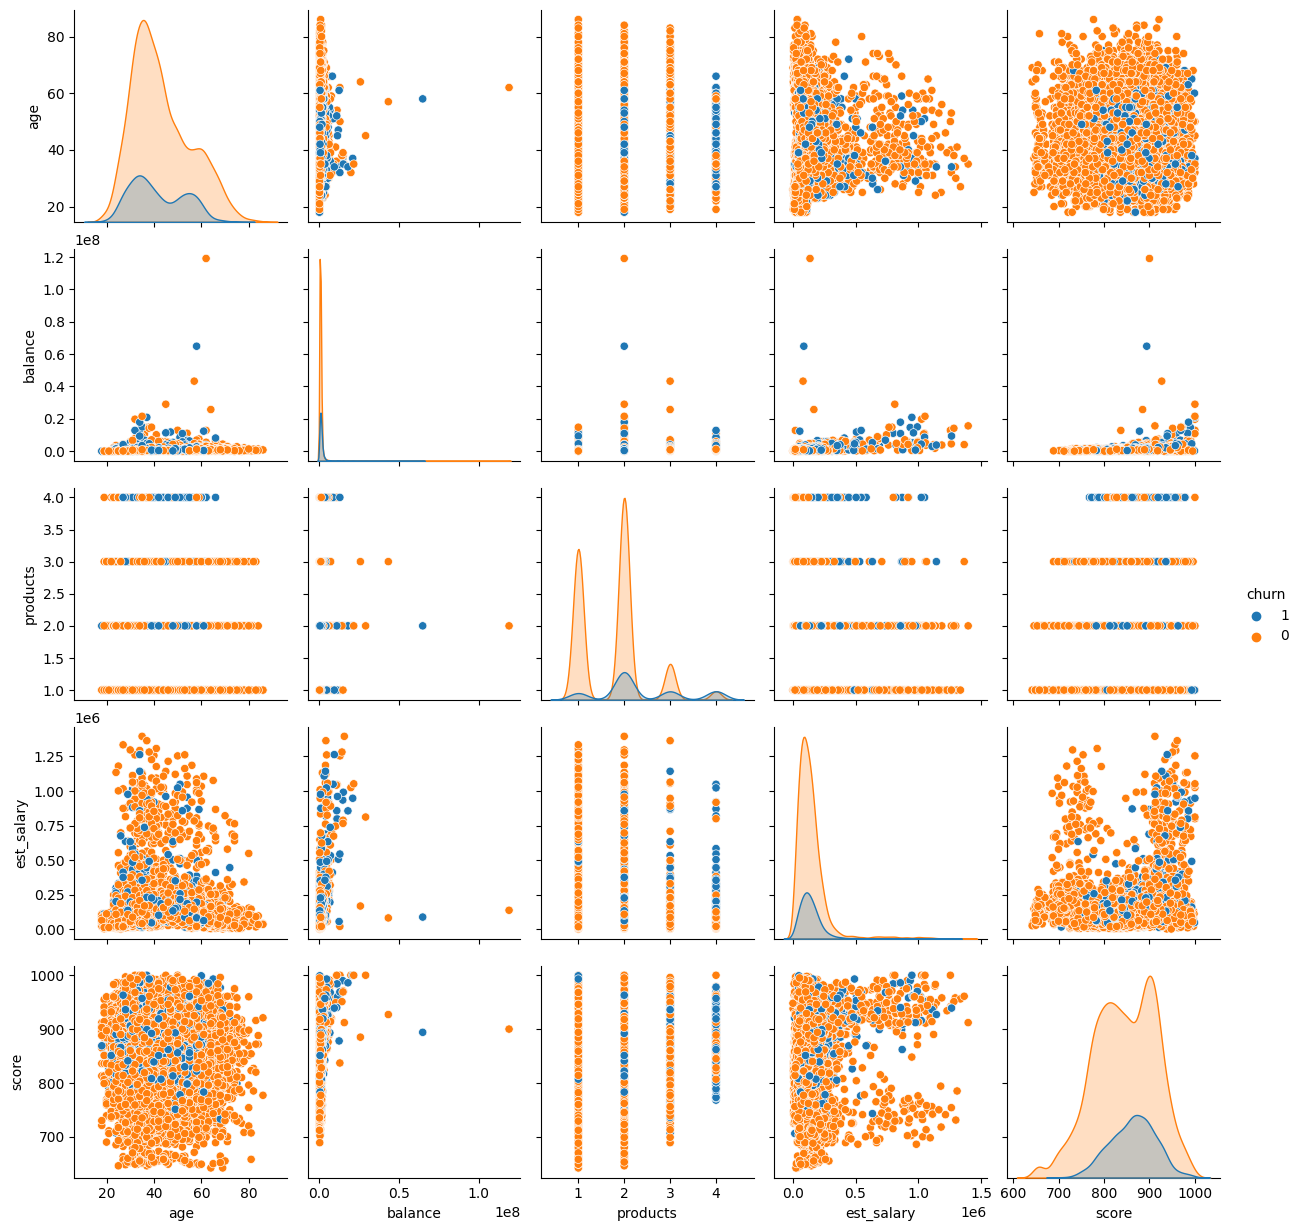

In [ ]:
# посмотрим диаграмму рассеивания
sns.pairplot(data[['age', 'balance', 'products', 'est_salary', 'score', 'churn']], hue='churn')

In [ ]:
corr = data.copy()
corr['equity'] = corr['equity'].astype(int)
corr['credit_card'] = corr['credit_card'].astype(int)
corr['last_activity'] = corr['last_activity'].astype(int)
corr['churn'] = corr['churn'].astype(int)
corr['gender'] = corr['gender'].map({'М':1, 'Ж':0})
corr['city_new'] = corr['city'].map({'Ярославль':0, 'Рыбинск':1, 'Ростов Великий':2})
corr = pd.get_dummies(corr)
corr.head(5)

,id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_new,city_Ростов,city_Рыбинск,city_Ярославль
0,183012,850,0,25,1,59214.82,2,0,1,75719.14,1,1.0,0,1,0
1,146556,861,0,37,5,850594.33,3,1,0,86621.77,0,1.0,0,1,0
2,120722,892,0,30,0,NaN,1,1,1,107683.34,0,1.0,0,1,0
3,225363,866,0,51,5,1524746.26,2,0,1,174423.53,1,0.0,0,0,1
4,157978,730,1,34,5,174.00,1,1,0,67353.16,1,0.0,0,0,1


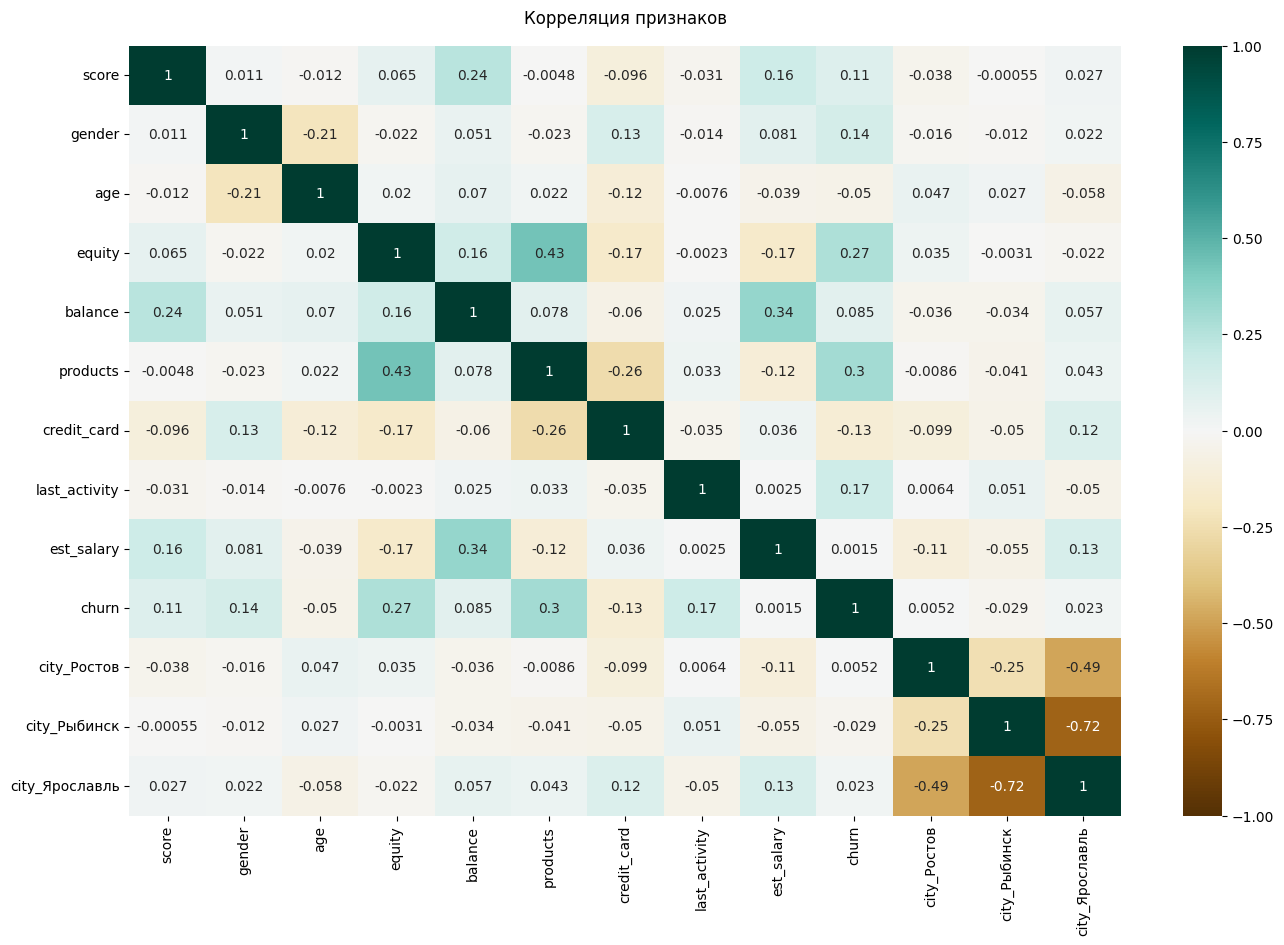

In [ ]:
corr = corr.drop(['id', 'city_new'], axis=1)
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(corr.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Корреляция признаков', fontdict={'fontsize':12}, pad=16);

Сильной связи между признаками не видно. Можно лишь увидеть небольшую зависимсоть:
- между количеством продуктов и оценки недвижимости: чем больше продуктов у клиента-тем выше оценка
- также между зарплатой и балансом: чем выше зарплата, тем больше баланс
- между продуктами и оттоком: чем больше продуктов тем выше отток
- между оценкой недвижимости и оттоком: чем выше оценка, тем больше отток
- между оценкой кредитного скоринга и балансом: чем выше оценка, тем больше баланс

**Вывод**: провели исследовательский анализ данных нашли интересные факты:
- оценка кредитного скоринга чуть выше у отточных клиентов
- зарплата (по графику распределения) имеет выбросы, которые мы ранее выявили. Не существенно выше зараплата по медиане у отточных (по графику "ящик с усами") в данных без выбросов.
- средний возраст примерно одинаков для всех клиентов
- баланс существенно выделяется - чем выше баланас тем больше становится отточных (по графику распределения). Посмотрев данные без выбросов в балансе ("ящик с усами") видим как медиана у отточных явно выше не отточных.
- наибольшее число клиентов в городе Ярославль, а доля отточных примерно равна между городами
- количество мужчин\женщин равное, а вот доля отточных выше у мужчин - 23%
- наибольшее число клиентов имеют оценку недвижимости от 0-5, при это доля наиболее отточных выше остальных с оценкой 3-5
- большинство клиентов имеют кредитную карту, но наибольшая доля отточных не имеющих ее - 25%
- количество активных\не активных равны, но доля отточных выше у активных - 24%
- средние высокие оценки имеют клиенты с 1 и 4 продуктами
- возраст примерно одинаков у всех
- средние зарплаты без учета выбросов выше у клиентов с 1 и 4 продуктами
- средний баланс без учета выбросов растет с увеличением продуктов у клиента: чем больше тем больше

### Сегментируем клиентов

Нами в ходе анализа было получены данные влияющие на отточность клиента. Мы выявили:
- наиболее отточные пользователи имеющие 4 продукта, также 3 продукта
- средний баланс клиентов уходящих с банка выше остальных
- оценка кредитного скоринга выше у отточных
- наиболее подвержены уходу мужчины
- уходят с банка больше клиентов не имеющих крединой карты
- наиболее отточны пользователи с оценкой недвижимости - 3-5
- уходят больше активных - лояльных клиентов.
- от количества продуктов меняется средний баланс: чем больше продуктов, тем выше баланс у клиента


Можно сегментировать клиентов по количеству продуктов:
- 1 группа - 1 продукт,
- 2 группа - 2 продукта,
- 3 группа - от 3-х и более продуктов.

In [ ]:
data.loc[(data['products'] == 1) & (data['balance'] < 2000000), 'группа'] = '1 группа'
data.loc[(data['products'] == 1) & (data['est_salary'] < 325000), 'группа'] = '1 группа'
data.loc[(data['products'] == 2) & (data['balance'] < 2000000), 'группа'] = '2 группа'
data.loc[(data['products'] == 2) & (data['est_salary'] < 325000), 'группа'] = '2 группа'
data.loc[(data['products'] >= 3) & (data['balance'] < 2000000), 'группа'] = '3 группа'
data.loc[(data['products'] >= 3) & (data['est_salary'] < 325000), 'группа'] = '3 группа'
data.loc[data['группа'].isnull(), 'группа'] = '4 группа VIP'
data.head()

,id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,группа
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,2 группа
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,3 группа
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,1 группа
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,2 группа
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,1 группа


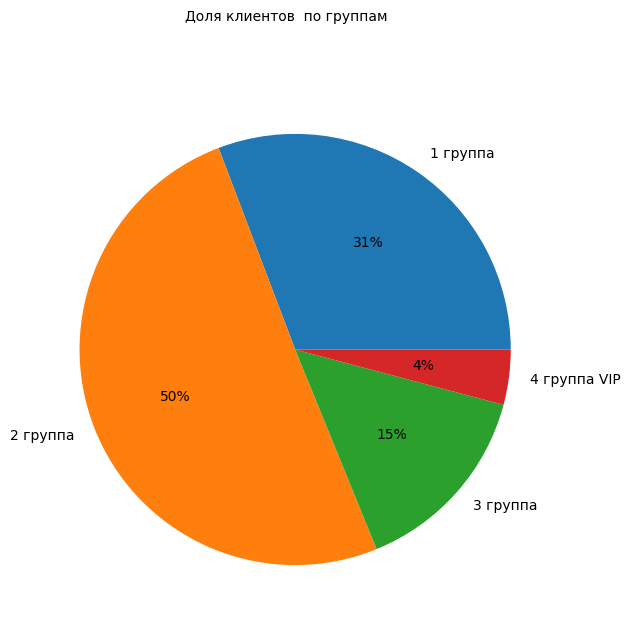

In [ ]:
# сделаем таблицу количества клиентов
group = data.groupby('группа')['id'].count().reset_index()

# построим график и визуально оценим долю
fig,(ax1) = plt.subplots(figsize=(7, 7))
fig.suptitle('Доля клиентов  по группам', fontsize=10)
ax1.pie(group['id'], labels=group['группа'], autopct='%.0f%%');

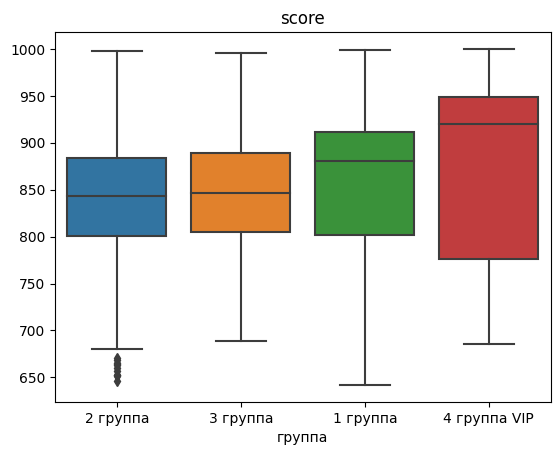

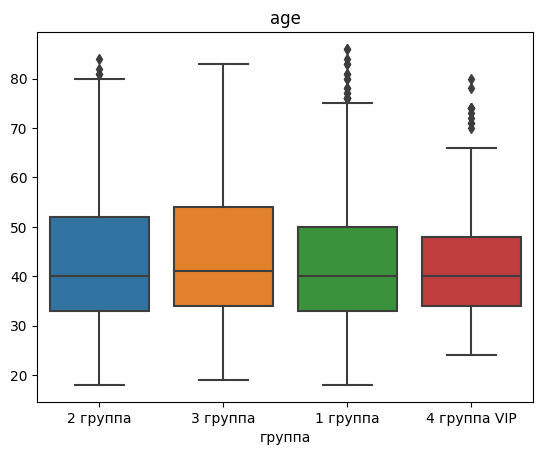

In [ ]:
for column in ['score','age']:
    plt.figure()
    sns.boxplot(data = data, y = column, x = 'группа')
    plt.xlabel('группа')
    plt.ylabel('')
    plt.title(column)
    plt.show();

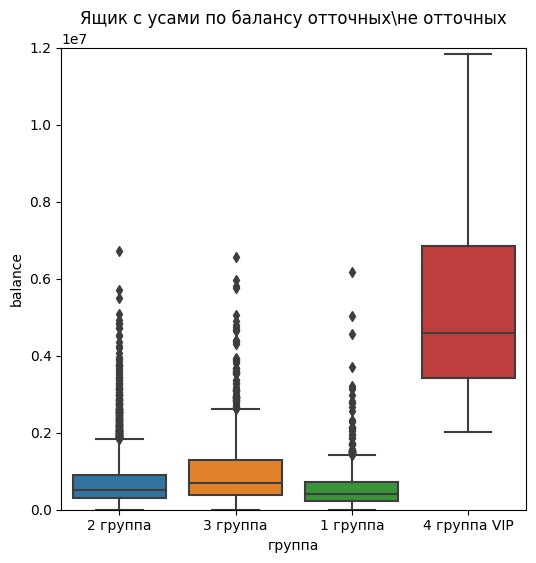

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='группа', y='balance', data=data)
plt.ylim(0, 12000000)
plt.title('Ящик с усами по балансу отточных\не отточных');

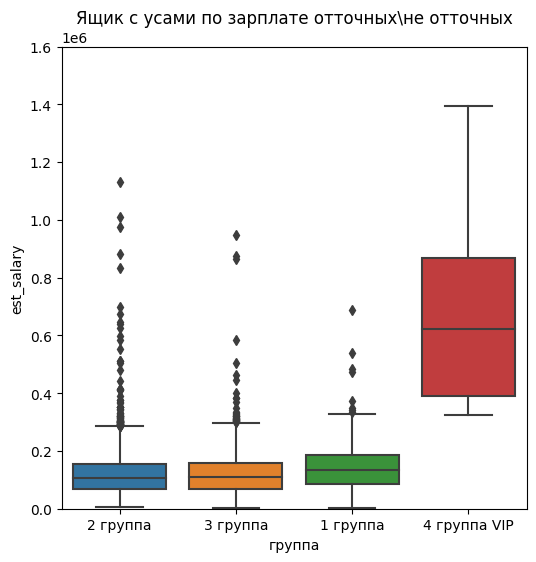

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='группа', y='est_salary', data=data)
plt.ylim(0, 1600000)
plt.title('Ящик с усами по зарплате отточных\не отточных');

In [ ]:
# создадим таблицу отточных\ не оттточных
for column in ['city', 'gender', 'equity', 'credit_card', 'last_activity']:
    group_data = data.pivot_table(index=['группа', column], values = 'id', aggfunc='count').reset_index()
    group_data = group_data.rename(columns={'id':'count'})
    group_data['total'] = group_data.groupby('группа')['count'].transform('sum')
    group_data = group_data.sort_values(by='total')
    group_data['persent'] = round(group_data['count']/group_data['total']*100, 2)

    # визуализируем таблицу
    fig = px.bar(group_data, x='группа', y='count', text='persent', color= column)
    fig.update_layout(title = f'График деления клиентов по {column} в разбивке по группам',
                      xaxis_title = 'Группа',
                      yaxis_title = 'Количество клиентов')
    fig.show()

In [ ]:
# построим таблицу для просмотра отточных клиентов по количеству продуктов
group_churn = data.pivot_table(index=['группа', 'churn'], values='id', aggfunc='count').reset_index()
group_churn = group_churn.rename(columns={'id':'count'})
group_churn['total'] = group_churn.groupby('группа')['count'].transform('sum')
group_churn = group_churn.sort_values(by='total')
group_churn['persent'] = round(group_churn['count']/group_churn['total']*100, 2)

# визуализируем таблицу
fig = px.bar(group_churn, x='count', y='группа', text='persent', color='churn')
fig.update_layout(title = 'График деления отточных/не отточных клиентов по группам',
                  xaxis_title = 'Количество клиентов',
                  yaxis_title = 'Количество продуктов у клиента')
fig.show()

"1 группа": доля клиентов в этом сегменте составляет 31% от общего числа клиентов банка. Клиенты в большинстве находятся в городе Ярославль. В данном сегменте сосредоточены клиенты со средними оценками кредитного скоринга 850. Средний возраст клиентов составляет 42 года. Средняя заработная плата составляет 140 т.р. В среднем баланс составляет 400-550 т.р. Клиентами в равной степени являются мужчины и женщины. В большинстве клиенты имеют оценку недвижимости "0"-56%. Количество клиентов с кредитной картой 86%. Лояльных клиентов почти равен количеству нелояльным. Отток в данном сегменте составляет 7% -самый маленький.

"2 группа": доля клиентов в этом сегменте составляет 50% от общего числа клиентов банка.  Клиенты в большинстве находятся в городе Ярославль.  В данном сегменте сосредоточены клиенты со средними оценками кредитного скоринга 850. Средний возраст клиентов составляет 42 года. Средняя заработная плата составляет 118 т.р. В среднем баланс составляет 500-750 т.р. Клиентами в равной степени являются мужчины и женщины. В большинстве клиенты имеют оценку недвижимости "3", "4" и "5". Количество клиентов с кредитной картой 62%. Лояльных клиентов почти равен количеству нелояльным. Отток в данном сегменте составляет 19%.

"3 группа": доля клиентов в этом сегменте составляет 15% от общего числа клиентов банка.  Клиенты в большинстве находятся в городе Ярославль.  В данном сегменте сосредоточены клиенты со средними оценками кредитного скоринга 850. Средний возраст клиентов составляет 43 года. Средняя заработная плата составляет 120 т.р. В среднем баланс составляет 700-900 т.р. Клиентами в равной степени являются мужчины и женщины. В большинстве клиенты имеют оценку недвижимости "3", "4" и "5". Количество клиентов с кредитной картой 45%. Лояльных клиентов почти равен количеству нелояльным. Клиенты имеют 3-4 продукта. Отток в данном сегменте составляет 39% - самый большая доля из всех.

"4 группа VIP": доля клиентов в этом сегменте составляет 4% от общего числа клиентов банка - самая малочисленная.  Клиенты в большинстве находятся в городе Ярославль.  В данном сегменте сосредоточены клиенты со средними оценками кредитного скоринга 880-920 - выше всех. Средний возраст клиентов составляет 42 года. Средняя заработная плата составляет 650 т.р. В среднем баланс составляет 4.5-6 млн.р. Клиентов мужского пола больще- 61%. В большинстве клиенты имеют оценку недвижимости "0" - 68%. Количество клиентов с кредитной картой 76%. Лояльных клиентов почти равен количеству нелояльным. Клиенты в основном имеют 1-2 продукта. Отток в данном сегменте составляет 13%.


### Составим портрет уходящего клиента

После проведенного анализа, мы можем сделать портрет клиента, который уходит с банка:
- количество продуктов 3-4
- мужчины среднего возраста 40-44 года
- баланс на счете в среднем выше всех остальных клиентов
- крединой карты они не имеют
- они активные-лояльные клиенты
- оценка недвижимости - от 3 до 5

## Проверка гипотез

**Гипотеза №1**

Проверим гипотезу о различии возраста между теми клиентами, которые
пользуются двумя продуктами банка, и теми, которые пользуются одним.Сформулируем нулевую и альтернативную гипотезы:  

Н_0: средний возраст клиентов, пользующихся одним продуктом банка = среднему возрасту клиентов, пользующихся двумя продуктами.

Н_а: средний возраст клиентов, пользующихся одним продуктом банка ≠ среднему возрасту клиентов, пользующихся двумя продуктами.

Полученные выборки достаточно велики и не зависимы друг от друга. Проверять гипотезу будем с помощью t-теста.

In [ ]:
age_1 = data[data['products']==1]['age']
age_2 = data[data['products']==2]['age']
results = st.ttest_ind(age_1, age_1, equal_var=False)

alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.0
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу отвергнуть не удалось: разницы в возрасте у клиентов с одним и двумя продуктами не наблюдается.

**Гипотеза №2**

Проверим гипотезу о различии баллов кредитного скоринга клиентов, имеющих 2 продукта и теми, которые имеют 1 продукт.

Н_0: средний балл клиентов, пользующихся одним продуктом банка = среднему баллу клиентов, пользующихся двумя продуктами.

Н_а: средний балл клиентов, пользующихся одним продуктом банка ≠ среднему баллу клиентов, пользующихся двумя продуктами.

Полученные выборки достаточно велики и не зависимы друг от друга. Проверять гипотезу будем с помощью t-теста.

In [ ]:
score_1 = data[data['products']==1]['score']
score_2 = data[data['products']==2]['score']
results = st.ttest_ind(score_1, score_2, equal_var=False)

alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

8.360904192597035e-10
Отвергаем нулевую гипотезу


Разница в баллах кредитного скоринга между клиентами пользующимися одним и двумя продуктами статистически значима.

## Общий вывод и рекомендации

На основании проведённого анализа можно сделать следующие заключение:
- 84% клиентов имеют не более двух продуктов в банке
- отток клиентов всего 18%
- уходят клиенты чаще имеющих 3 и 4 продукта.
- средний возраст клиентов банка 42 года и отток не зависит от него.
- больше клиентов в городе Ярославль, оттток по городам примерно одинаков.
- лояльные клиенты уходят чаще
- мужчины уходят чаще женщин
- баланс уходящих клиентов выше чем оставшихся в банке
- оценка недвижимости у клиентов ушедших высокая - 3-5
- средняя оценка кредитного скоринга отточных выше не отточных клиентов

Мы сегментировали клиентов по количеству продуктов, зарплате и балансу где:
- 1 группа - клиенты с 1 продуктом и зарплатой < 325.р. и балансом не выше < 2 млн.р.
- 2 группа - клиенты с 2 продуктами и зарплатой < 325.р. и балансом не выше < 2 млн.р.
- 3 группа - клиенты с 3-4 продуктами и зарплатой < 325.р. и балансом не выше < 2 млн.р.
- 4 группа VIP - клиенты c зарплатой > 325.р. и балансом не выше > 2 млн.р.

"1 группа": доля клиентов в этом сегменте составляет 31% от общего числа клиентов банка. Клиенты в большинстве находятся в городе Ярославль. В данном сегменте сосредоточены клиенты со средними оценками кредитного скоринга 850. Средний возраст клиентов составляет 42 года. Средняя заработная плата составляет 140 т.р. В среднем баланс составляет 400-550 т.р. Клиентами в равной степени являются мужчины и женщины. В большинстве клиенты имеют оценку недвижимости "0"-56%. Количество клиентов с кредитной картой 86%. Лояльных клиентов почти равен количеству нелояльным. Отток в данном сегменте составляет 7% -самый маленький.

"2 группа": доля клиентов в этом сегменте составляет 50% от общего числа клиентов банка.  Клиенты в большинстве находятся в городе Ярославль.  В данном сегменте сосредоточены клиенты со средними оценками кредитного скоринга 850. Средний возраст клиентов составляет 42 года. Средняя заработная плата составляет 118 т.р. В среднем баланс составляет 500-750 т.р. Клиентами в равной степени являются мужчины и женщины. В большинстве клиенты имеют оценку недвижимости "3", "4" и "5". Количество клиентов с кредитной картой 62%. Лояльных клиентов почти равен количеству нелояльным. Отток в данном сегменте составляет 19%.

"3 группа": доля клиентов в этом сегменте составляет 15% от общего числа клиентов банка.  Клиенты в большинстве находятся в городе Ярославль.  В данном сегменте сосредоточены клиенты со средними оценками кредитного скоринга 850. Средний возраст клиентов составляет 43 года. Средняя заработная плата составляет 120 т.р. В среднем баланс составляет 700-900 т.р. Клиентами в равной степени являются мужчины и женщины. В большинстве клиенты имеют оценку недвижимости "3", "4" и "5". Количество клиентов с кредитной картой 45%. Лояльных клиентов почти равен количеству нелояльным. Клиенты имеют 3-4 продукта. Отток в данном сегменте составляет 39% - самый большая доля из всех.

"4 группа VIP": доля клиентов в этом сегменте составляет 4% от общего числа клиентов банка - самая малочисленная.  Клиенты в большинстве находятся в городе Ярославль.  В данном сегменте сосредоточены клиенты со средними оценками кредитного скоринга 880-920 - выше всех. Средний возраст клиентов составляет 42 года. Средняя заработная плата составляет 650 т.р. В среднем баланс составляет 4.5-6 млн.р. Клиентов мужского пола больще- 61%. В большинстве клиенты имеют оценку недвижимости "0" - 68%. Количество клиентов с кредитной картой 76%. Лояльных клиентов почти равен количеству нелояльным. Клиенты в основном имеют 1-2 продукта. Отток в данном сегменте составляет 13%.

В результате проверки гипотез удалось выяснить:
- что разницы в средней возрасте между клиентами с одним продуктом и двумя нет
- что есть статистическая разница в средней оценке кредитного скоринга между клиентами с одним продуктом и двумя.

**Рекомендации:**
- для "1 группы" - разработать дополнительные продукты, так как клиенты с одним продуктом имеют самый низкий отток. Продукт должен быть ориентирован на клиентов с небольшим балансом и оценкой недвижимости "0". Например можно предолжить второй продукт - кредит с заниженной процентной ставкой или вклад с повышенным процентом для привлечения дополнительных денег.
- для "2 группы" - разработать дополнительные продукты, ориентированный на клиентов с небольшим балансом и оценкой недвижимости "3", "4", "5". Например можно провести маркетинговые акции для удержания клиентов, повышением кэшбека по карте или начисления бонусов.
- для "3 группы" - так как в данном сегменте мы наблюдаем большой отток - 39%, стоит выяснить причину качества предлагаемых продуктов и предложить для них более выгодные условия, ориентированные на клиентов с оценкой "3", "4", "5". Здесь нужно понять причину ухода большого количества клиентов именно с 3-4 продуктами, возможно качество предлагаемых банком продуктов хуже чем у конкурентов. Возможно у других банков лучше и выгоднее процентные ставки по кредитам и пользователи переходят к ним по программе рефенансироввания. Нужно провести анализ процентных ставок банка по сравнению с конкурентами. Предложить для клиентов единый продукт, подразумевающий преференции для таких клиентов, например пониженная ставка кредита.
- для "4 группы VIP" - так как в этом сегменте VIP- клиенты, то нужно создать продукт ориентированный на клиентов с высоким балансом и зарплатой и оценкой недвижимости "0". Например повышенные процентные ставки по депозиту-вкладу. Поскольку в основном 1-2 продукта используют клиенты этого сегмента. Можно разработать совершенно новый продукт под них - кредитную карту с возможностью больше тратить по ней чем остальные клиенты и повышенным кэшбеком если больше тратят.